# Lab 07. 로지스틱 회귀의 결정 경계 실습 
---

In [1]:
import torch
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt 

## 임의의 데이터 생성

In [2]:
x = torch.randn(100, 2)
y =((x[:,0] > 0.5) & (x[:,1] >0.5)).float()

print(x, y)

tensor([[ 0.3514,  1.6718],
        [-0.8217,  0.9794],
        [ 1.0416,  0.4153],
        [ 1.1551,  0.6572],
        [-0.0760, -0.1921],
        [ 1.9886, -0.1721],
        [ 1.6780, -1.2221],
        [ 1.0488, -1.7808],
        [ 1.7897, -0.0879],
        [-0.2869, -0.4301],
        [-1.3972,  0.5212],
        [ 2.9602,  1.2404],
        [-0.3369,  2.8522],
        [ 1.1165,  0.3948],
        [-0.4577, -1.5496],
        [-0.2290, -1.0707],
        [-1.8355,  0.9438],
        [ 1.4836, -0.2835],
        [ 0.9427, -0.4945],
        [-0.4982,  0.7775],
        [-2.6538,  1.3672],
        [-1.1687,  0.9553],
        [ 0.8294,  0.6971],
        [ 0.5968,  1.0073],
        [ 0.0997, -0.0892],
        [-1.0485, -1.6155],
        [ 0.7406,  0.0111],
        [-0.8394, -0.7543],
        [ 1.5721, -1.5810],
        [ 1.1777, -0.5871],
        [-0.5102,  1.0993],
        [-0.2682,  0.5081],
        [ 1.4312,  0.8934],
        [ 1.4339, -1.3772],
        [ 0.3569,  0.1047],
        [ 0.8770,  0

## 모델 정의 

In [3]:
class LogisiticRegression(torch.nn.Module) : 
    def __init__(self, input_dim, output_dim) : 
        super(LogisiticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x) : 
        out = self.linear(x)
        fc = F.sigmoid(out)
        print("fc >>>" ,fc)
        return fc
    
model = LogisiticRegression(input_dim=2, output_dim=1)

print(model)

LogisiticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


## 모델 학습, 결정 경계 그리기

fc >>> tensor([[0.4838],
        [0.6054],
        [0.3159],
        [0.3151],
        [0.4280],
        [0.1887],
        [0.1757],
        [0.2095],
        [0.2101],
        [0.4427],
        [0.6547],
        [0.1604],
        [0.6508],
        [0.3057],
        [0.3979],
        [0.3956],
        [0.7301],
        [0.2316],
        [0.2799],
        [0.5482],
        [0.8273],
        [0.6500],
        [0.3587],
        [0.4083],
        [0.4100],
        [0.4763],
        [0.3311],
        [0.5006],
        [0.1714],
        [0.2494],
        [0.5698],
        [0.4988],
        [0.2944],
        [0.1907],
        [0.3866],
        [0.3168],
        [0.3304],
        [0.3944],
        [0.4055],
        [0.3961],
        [0.6407],
        [0.7491],
        [0.3007],
        [0.4872],
        [0.2508],
        [0.7085],
        [0.7769],
        [0.3918],
        [0.2083],
        [0.7160],
        [0.3707],
        [0.5400],
        [0.2892],
        [0.6074],
        [0.5914],
   

c:\Users\kss34\anaconda3\envs\pytorchPractice\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


fc >>> tensor([[0.3720],
        [0.1744],
        [0.2914],
        [0.3348],
        [0.1370],
        [0.3261],
        [0.1817],
        [0.1027],
        [0.3137],
        [0.1099],
        [0.1062],
        [0.6498],
        [0.4497],
        [0.2972],
        [0.0553],
        [0.0805],
        [0.1074],
        [0.2572],
        [0.1865],
        [0.1825],
        [0.0905],
        [0.1475],
        [0.3021],
        [0.3142],
        [0.1562],
        [0.0395],
        [0.2166],
        [0.0707],
        [0.1454],
        [0.1976],
        [0.2111],
        [0.1774],
        [0.4010],
        [0.1511],
        [0.1922],
        [0.2342],
        [0.4274],
        [0.0434],
        [0.0403],
        [0.0749],
        [0.0618],
        [0.0620],
        [0.3686],
        [0.4115],
        [0.0903],
        [0.2494],
        [0.0575],
        [0.0822],
        [0.2262],
        [0.3073],
        [0.1329],
        [0.1834],
        [0.1514],
        [0.0524],
        [0.2442],
   

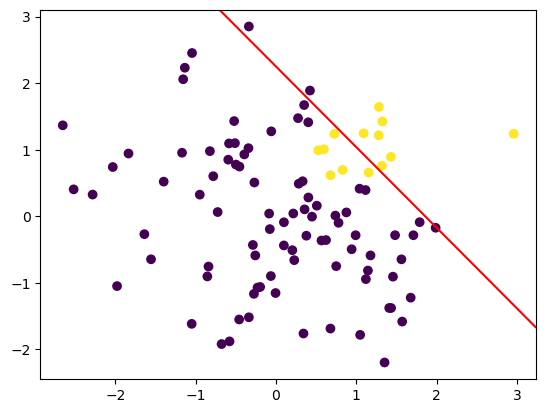

In [4]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000) : 
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정 경계 그리기 
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim() # x 좌표 최소값 최대값 
y_min, y_max = plt.ylim() # Y 좌표 최소값 최대값 

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() -> x, y 좌표를 기반으로 격자 포인트 생성
xx, yy -> 2차원 배열 가집니다.
"""

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
"""
xx yy -> np.c_[] : xx yy 연결-> torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 -> 변환된 입력 -> 모델 전달 
-> .detach().numpy() 예측값을 넘파이 형태로 변환 -> z 저장
"""
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
"""
plt.contour() -> xx, yy 격자에 대응하는 결정 경계 그리는 함수 
"""
plt.show()